In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}


In [3]:
def polynomial_dataframe(feature, output, degree): # feature and output is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1']=feature
    poly_dataframe['output']=output
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name]=feature**power
    return poly_dataframe

In [4]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort(['sqft_living','price'])

house_set_4_data = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)
house_set_3_data = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
house_set_2_data = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
house_set_1_data = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
house_test_data = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)
house_train_data = pd.read_csv('wk3_kc_house_train_data.csv', dtype=dtype_dict)
house_valid_data = pd.read_csv('wk3_kc_house_valid_data.csv', dtype=dtype_dict)
for i in [house_set_4_data, house_set_3_data, house_set_2_data, house_set_1_data, house_test_data, house_train_data, house_valid_data]:
    i = i.sort(['sqft_living', 'price'])

/Users/patelpri/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
/Users/patelpri/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [5]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0.0,0.00,290.0,20875,1,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
15381,2856101479,20140701T000000,276000.0,1.0,0.75,370.0,1801,1,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
860,1723049033,20140620T000000,245000.0,1.0,0.75,380.0,15000,1,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,213444,1,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900,1,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0


In [6]:
poly1_data = polynomial_dataframe(sales['sqft_living'], sales['price'], 1)

In [7]:
from sklearn import linear_model
model1=linear_model.LinearRegression()

In [8]:
print(poly1_data['power_1'].reshape(-1,1).shape)

model1.fit(poly1_data[['power_1']], poly1_data[['output']])

(21613, 1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
model1.predict(poly1_data[['power_1']])

array([[   37800.09159579],
       [   60249.97702758],
       [   63056.21270656],
       ..., 
       [ 2773879.8785959 ],
       [ 3337933.25006977],
       [ 3756062.36623697]])

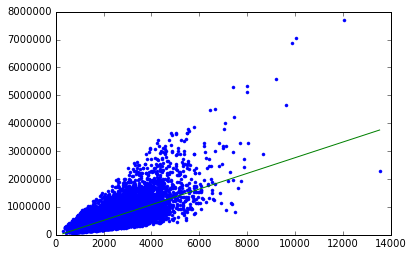

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly1_data['power_1'],poly1_data['output'],'.',
poly1_data['power_1'], model1.predict(poly1_data[['power_1']]),'-')

In [11]:
features=['power_1','power_2']
poly2_data=polynomial_dataframe(sales['sqft_living'],sales['price'],2)

poly2_data.head()

,power_1,output,power_2
19452,290.0,142000.0,84100.0
15381,370.0,276000.0,136900.0
860,380.0,245000.0,144400.0
18379,384.0,265000.0,147456.0
4868,390.0,228000.0,152100.0


In [12]:
model2=linear_model.LinearRegression().fit(poly2_data[features],poly1_data[['output']])

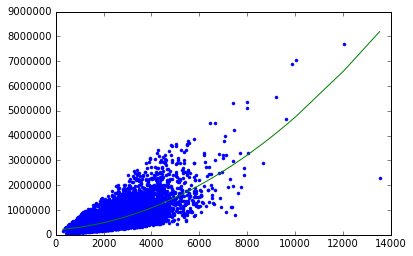

In [13]:
plt.plot(poly1_data['power_1'],poly1_data['output'],'.',
poly1_data['power_1'], model2.predict(poly2_data[features]),'-')

In [14]:
def model_predict(poly, orig_data):
    features = ['power_%d'%(x+1) for x in range(poly)]
    data=polynomial_dataframe(orig_data['sqft_living'],orig_data['price'], poly)
    model=linear_model.LinearRegression()
    model.fit(data[features],data[['output']])
    print(model.coef_)
    plt.plot(data['power_1'],data['output'],'.',
    data['power_1'], model.predict(data[features]),'-')
    return model

[[  4.56404164e-91   1.42711969e-50   1.72756064e-55   0.00000000e+00
    0.00000000e+00   2.68575170e-71   2.26147568e-67   1.85900299e-63
    1.47144116e-59   1.09771012e-55   7.43509038e-52   4.23015578e-48
    1.61618577e-44  -2.49283826e-48   9.59718336e-53]]


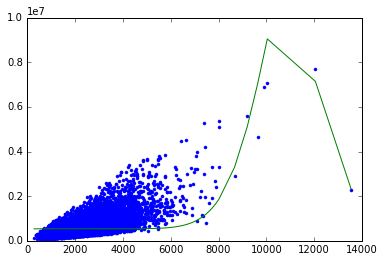

In [15]:
x=model_predict(15, sales)

1
[[  1.37062036e-76  -7.34923934e-40  -1.26052210e-44   9.19265012e-50
    0.00000000e+00   0.00000000e+00   1.27051320e-54   4.87799084e-51
    1.73524691e-47   5.46982653e-44   1.39568452e-40   2.25011155e-37
   -9.43820708e-41   1.31553951e-44  -6.09070614e-49]]


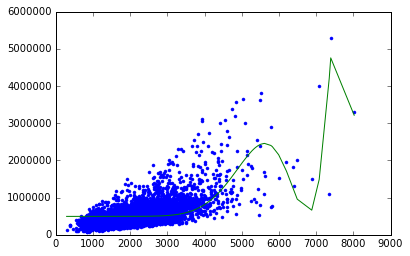

In [16]:
count=1
for h in [house_set_4_data]:#, house_set_3_data, house_set_2_data, house_set_1_data, house_test_data]:
    print(count)
    model_predict(15,h)
    count+=1


In [17]:
def model_predict1(poly, orig_data):
    features = ['power_%d'%(x+1) for x in range(poly)]
    data=polynomial_dataframe(orig_data['sqft_living'],orig_data['price'], poly)
    valid=polynomial_dataframe(house_valid_data['sqft_living'],house_valid_data['price'],poly)
    model=linear_model.LinearRegression()
    model.fit(data[features],data[['output']])
    predict = model.predict(valid[features])
   # print(predict.shape,valid[['output']].shape)
  #  RSS=
    return (poly, ((valid[['output']]-predict)**2).sum()[0], model)
    

In [18]:
models=[]
for x in range(1,15):
    poly, rss, model = model_predict1(x,house_train_data)
    models.append((rss,poly,model))
models.sort()
models[0]

(566268640171663.25,
 6,
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))

In [19]:
test=polynomial_dataframe(house_test_data['sqft_living'],house_test_data['price'],6)
features = ['power_%d'%(x+1) for x in range(6)]

In [20]:
predict = models[0][2].predict(test[features])

In [21]:
((test[['output']]-predict)**2).sum()[0]

135225112059292.66

In this assignment, we will run ridge regression multiple times with different L2 penalties to see which one produces the best fit. We will revisit the example of polynomial regression as a means to see the effect of L2 regularization. In particular, we will:
<li>
<ul>Use a pre-built implementation of regression to run polynomial regression</ul>
<ul>Use matplotlib to visualize polynomial regressions</ul>
<ul>Use a pre-built implementation of regression to run polynomial regression, this time with L2 penalty</ul>
<ul>Use matplotlib to visualize polynomial regressions under L2 regularization</ul>
<ul>Choose best L2 penalty using cross-validation.</ul>
<ul>Assess the final fit using test data.</ul></li>
We will continue to use the House data from previous assignments. (In the next programming assignment for this module, you will implement your own ridge regression learning algorithm using gradient descent.)

In [22]:
def polynomial_dataframe1(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1']=feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name]=feature**power
    return poly_dataframe

In [23]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort(['sqft_living','price'])

/Users/patelpri/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [24]:
l2_small_penalty = 1.5e-5

In [25]:
poly15_data = polynomial_dataframe1(sales['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model_ridge = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model_ridge.fit(poly15_data, sales['price'])

Ridge(alpha=1.5e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [26]:
print(model_ridge.coef_)

[  1.24873306e+02  -4.77376011e-02   3.01446238e-05  -2.44419942e-09
  -1.94153675e-13   8.54085686e-18   1.51142121e-21   8.27979094e-26
   6.52603100e-31  -3.27895017e-34  -3.87962315e-38  -2.72437650e-42
  -1.07790800e-46   3.78242694e-51   1.39790296e-54]


[[  3.05794168e-90   2.21229690e-49   8.63662865e-55   9.95682444e-60
    0.00000000e+00   1.10366089e-70   8.37724029e-67   6.23411957e-63
    4.49156442e-59   3.06938763e-55   1.91749300e-51   1.01335180e-47
    3.62176959e-44  -5.63501661e-48   2.18641116e-52]]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

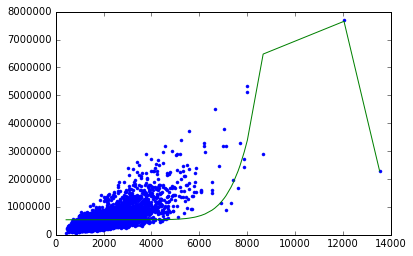

In [27]:
model_predict(15,house_set_1_data)

[[  2.68007775e-77  -1.28312998e-39  -1.64848529e-44  -2.26421780e-49
    2.08809743e-53   0.00000000e+00   3.62866510e-55   1.49807492e-51
    5.73974470e-48   1.95158344e-44   5.37897073e-41   9.38035593e-38
   -3.62478335e-41   4.63968390e-45  -1.96489968e-49]]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

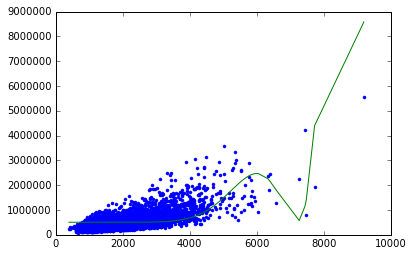

In [28]:
model_predict(15,house_set_2_data)

[[  2.83751934e-88   1.17220380e-48   1.96706490e-55   0.00000000e+00
    0.00000000e+00   4.27894986e-69   2.68009626e-65   1.63911362e-61
    9.66435015e-58   5.38044653e-54   2.72563636e-50   1.16253248e-46
    3.33756141e-43  -6.76238818e-47   3.43132932e-51]]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

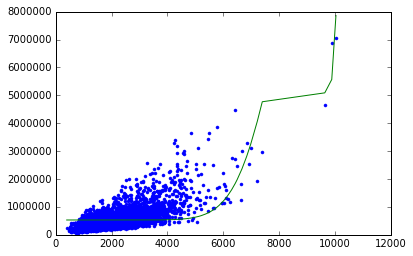

In [29]:
model_predict(15,house_set_3_data)

[[  1.37062036e-76  -7.34923934e-40  -1.26052210e-44   9.19265012e-50
    0.00000000e+00   0.00000000e+00   1.27051320e-54   4.87799084e-51
    1.73524691e-47   5.46982653e-44   1.39568452e-40   2.25011155e-37
   -9.43820708e-41   1.31553951e-44  -6.09070614e-49]]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

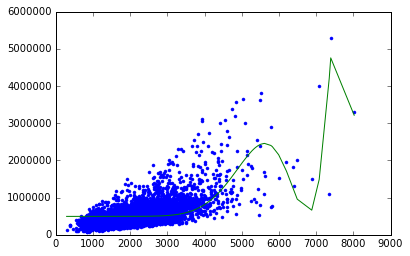

In [30]:
model_predict(15,house_set_4_data)

In [31]:
def model_predict_ridge(poly, orig_data, l2_small_penalty):
    features = ['power_%d'%(x+1) for x in range(poly)]
    data=polynomial_dataframe(orig_data['sqft_living'],orig_data['price'], poly)
    model=linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
    model.fit(data[features],data[['output']])
    print(model.coef_)
    plt.plot(data['power_1'],data['output'],'.',
    data['power_1'], model.predict(data[features]),'-')
    return model

[[  5.44669385e+02  -3.55447590e-01   1.22446374e-04  -1.17175296e-08
   -3.90512625e-13  -1.39076345e-17   1.47860300e-20   6.87492229e-25
   -7.57204392e-29  -1.04097309e-32  -3.71844097e-37   3.39989492e-41
    5.56591919e-45   2.53761378e-49  -3.35152906e-53]]


Ridge(alpha=1e-09, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

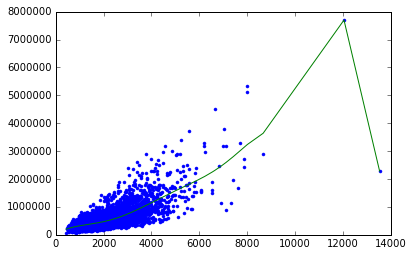

In [32]:
model_predict_ridge(15,house_set_1_data,1e-9)

[[  8.59362656e+02  -8.18118264e-01   4.28879956e-04  -9.12770477e-08
   -2.69604991e-12   3.73980386e-15  -1.42711915e-19  -6.30794711e-23
   -1.44559674e-27   7.44321327e-31   9.25865990e-35   3.28028753e-41
   -1.29543539e-42  -1.38781255e-46   1.66546453e-50]]


Ridge(alpha=1e-09, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

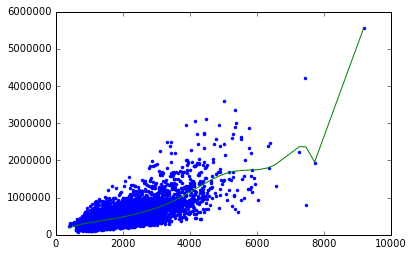

In [33]:
model_predict_ridge(15,house_set_2_data,1e-9)

[[ -7.55395832e+02   9.75579382e-01  -4.58945912e-04   7.77957824e-08
    7.15013823e-12  -2.88602001e-15  -2.13678613e-20   3.38085343e-23
    2.19178093e-27  -1.97067775e-31  -4.15993123e-35  -1.80196078e-39
    3.19070923e-43   5.08457082e-47  -3.93304301e-51]]


Ridge(alpha=1e-09, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

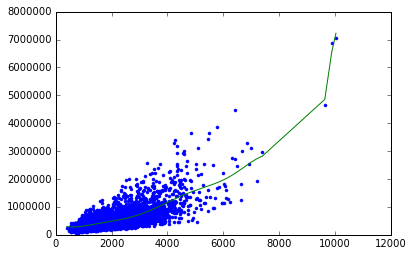

In [34]:
model_predict_ridge(15,house_set_3_data,1e-9)

[[  1.11944564e+03  -9.83760086e-01   3.38770792e-04   3.60377664e-08
   -4.37814111e-11   5.77191729e-15   7.66795357e-19  -9.49297828e-23
   -1.96030787e-26  -2.10891179e-32   3.31005123e-34   3.47734007e-38
   -2.43039313e-42  -8.79553482e-46   6.44569819e-50]]


Ridge(alpha=1e-09, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

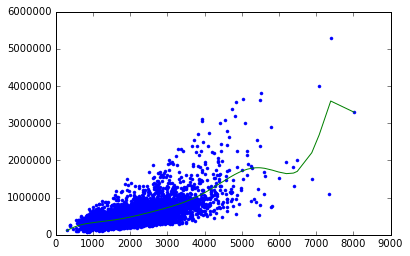

In [35]:
model_predict_ridge(15,house_set_4_data,1e-9)

[[  2.32806803e+00   3.53621608e-04   3.31969692e-08   2.00082477e-12
    1.11492559e-16   6.57786122e-21   4.12939525e-25   2.70393755e-29
    1.81614763e-33   1.23824277e-37   8.51872481e-42   5.89455598e-46
    4.09542560e-50   2.85464889e-54   1.99547476e-58]]


Ridge(alpha=123.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

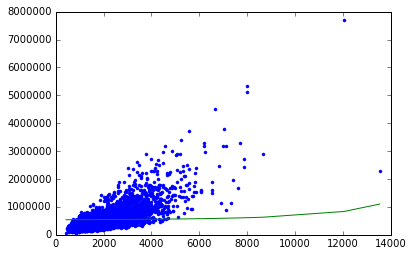

In [36]:
model_predict_ridge(15,house_set_1_data,1.23e2)

[[  2.09756903e+00   3.90817483e-04   6.67189944e-08   8.90002997e-12
    9.72639877e-16   9.69733682e-20   9.50564475e-24   9.44491031e-28
    9.57191338e-32   9.86945155e-36   1.03101115e-39   1.08729784e-43
    1.15453748e-47   1.23211305e-51   1.31986696e-55]]


Ridge(alpha=123.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

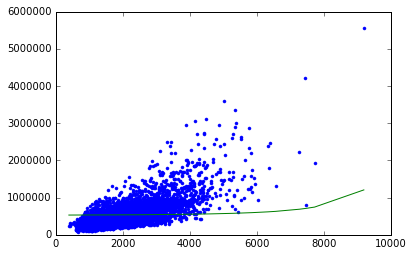

In [37]:
model_predict_ridge(15,house_set_2_data,1.23e2)

[[  2.28906258e+00   4.12472190e-04   6.08835345e-08   6.58572163e-12
    6.15278155e-16   5.64446634e-20   5.28834396e-24   5.07091402e-28
    4.94657273e-32   4.88043809e-36   4.85009106e-40   4.84161534e-44
    4.84635021e-48   4.85883628e-52   4.87558469e-56]]


Ridge(alpha=123.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

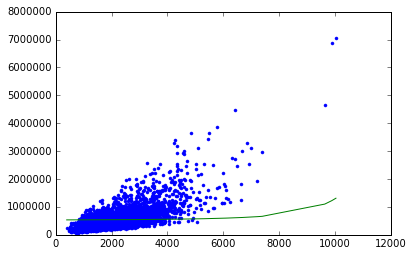

In [38]:
model_predict_ridge(15,house_set_3_data,1.23e2)

[[  2.08596194e+00   4.05035772e-04   7.46864647e-08   1.13096608e-11
    1.45864442e-15   1.73561251e-19   2.01609632e-23   2.34605255e-27
    2.75636073e-31   3.27043069e-35   3.91046855e-39   4.70118041e-43
    5.67212304e-47   6.85958087e-51   8.30843630e-55]]


Ridge(alpha=123.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

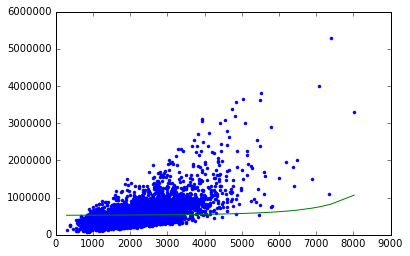

In [39]:
model_predict_ridge(15,house_set_4_data,1.23e2)

Selecting an L2 penalty via cross-validation

12. Just like the polynomial degree, the L2 penalty is a "magic" parameter we need to select. We could use the validation set approach as we did in the last module, but that approach has a major disadvantage: it leaves fewer observations available for training. Cross-validation seeks to overcome this issue by using all of the training set in a smart way.

We will implement a kind of cross-validation called k-fold cross-validation. The method gets its name because it involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:

Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
...
Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. Notice that all observations are used for both training and validation, as we iterate over segments of data.

13. To estimate the generalization error well, it is crucial to shuffle the training data before dividing them into segments. We reserve 10% of the data as the test set and randomly shuffle the remainder. Le'ts call the shuffled data 'train_valid_shuffled'.

For the purpose of this assignment, let us download the csv file containing pre-shuffled rows of training and validation sets combined:

In [41]:
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

Divide the combined training and validation set into equal segments. Each segment should receive n/k elements, where n is the number of observations in the training set and k is the number of segments. Since the segment 0 starts at index 0 and contains n/k elements, it ends at index (n/k)-1. The segment 1 starts where the segment 0 left off, at index (n/k). With n/k elements, the segment 1 ends at index (n*2/k)-1. Continuing in this fashion, we deduce that the segment i starts at index (n*i/k) and ends at (n*(i+1)/k)-1.

With this pattern in mind, we write a short loop that prints the starting and ending indices of each segment, just to make sure you are getting the splits right.

In [42]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in range(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print(i, (start, end))

0 (0.0, 1938.6)
1 (1939.6, 3878.2)
2 (3879.2, 5817.8)
3 (5818.8, 7757.4)
4 (7758.4, 9697.0)
5 (9698.0, 11636.6)
6 (11637.6, 13576.2)
7 (13577.2, 15515.8)
8 (15516.8, 17455.4)
9 (17456.4, 19395.0)


Now we are ready to implement k-fold cross-validation. Write a function that computes k validation errors by designating each of the k segments as the validation set. It accepts as parameters (i) k, (ii) l2_penalty, (iii) dataframe containing input features (e.g. poly15_data) and (iv) column of output values (e.g. price). The function returns the average validation error using k segments as validation sets. We shall assume that the input dataframe does not contain the output column.

For each i in [0, 1, ... k-1]:

Compute starting and ending indices of segment i and call 'start' and 'end'
Form validation set by taking a slice (start:end+1) from the data.
Form training set by appending slice (end+1:n) to the end of slice (0:start).
Train a linear model using training set just formed, with a given l2_penalty
Compute validation error (RSS) using validation set just formed


In [43]:
def k_fold_cross_validation(k, l2_penalty, data, output):
    n=len(data)
  #  print(n, len(output))
    RSS=[]
    for i in range(k):
        
        start = int((n*i)/k)
        end = int((n*(i+1))/k-1)
        #print(i, start, end, n/k)
        validation_set = data[start:end+1]
        
        validation_set_output=output[start:end+1]
        train_set = data[0:start].append(data[end+1:n])
       # print(i, validation_set.shape, validation_set_output.shape)
        train_set_output = output[0:start].append(output[end+1:n])
        #print(i, train_set.shape, train_set_output.shape)
        model=linear_model.Ridge(alpha=l2_penalty, normalize=True)
        model.fit(train_set,train_set_output)
        prediction=model.predict(validation_set)
        RSS.append(((validation_set_output-prediction)**2).sum())
        
    return np.array(RSS).mean()

In [44]:
poly15_data = polynomial_dataframe1(train_valid_shuffled['sqft_living'], 15)

In [45]:
k_fold_cross_validation(10,1.23e2,poly15_data,train_valid_shuffled[['price']])
#np.isinf(poly15_data.sum())

258740726050977.06

In [46]:
print([10**(3+(i*.5)) for i in range(0,13)])
print(np.logspace(3,9,num=13))

[1000.0, 3162.2776601683795, 10000.0, 31622.776601683792, 100000.0, 316227.7660168379, 1000000.0, 3162277.6601683795, 10000000.0, 31622776.60168379, 100000000.0, 316227766.01683795, 1000000000.0]
[  1.00000000e+03   3.16227766e+03   1.00000000e+04   3.16227766e+04
   1.00000000e+05   3.16227766e+05   1.00000000e+06   3.16227766e+06
   1.00000000e+07   3.16227766e+07   1.00000000e+08   3.16227766e+08
   1.00000000e+09]


In [47]:
l=[]
for l2_penalty in np.logspace(3,9,num=13):
    #print(l2_penalty)
    l.append((k_fold_cross_validation(10,l2_penalty,poly15_data,train_valid_shuffled[['price']]),l2_penalty))
print(l)
l.sort()
print(l)

[(264977361036975.91, 1000.0), (265692935858318.25, 3162.2776601683795), (265924368957215.69, 10000.0), (265998081509342.81, 31622.776601683792), (266021444553980.5, 100000.0), (266028837918724.44, 316227.76601683791), (266031176438468.16, 1000000.0), (266031915996607.25, 3162277.6601683795), (266032149870752.59, 10000000.0), (266032223828783.75, 31622776.601683792), (266032247216419.94, 100000000.0), (266032254612245.0, 316227766.01683795), (266032256951011.16, 1000000000.0)]
[(264977361036975.91, 1000.0), (265692935858318.25, 3162.2776601683795), (265924368957215.69, 10000.0), (265998081509342.81, 31622.776601683792), (266021444553980.5, 100000.0), (266028837918724.44, 316227.76601683791), (266031176438468.16, 1000000.0), (266031915996607.25, 3162277.6601683795), (266032149870752.59, 10000000.0), (266032223828783.75, 31622776.601683792), (266032247216419.94, 100000000.0), (266032254612245.0, 316227766.01683795), (266032256951011.16, 1000000000.0)]


In [49]:
k_fold_cross_validation(10,1.23e-4,poly15_data,train_valid_shuffled[['price']])

743815537915683.5